<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings("error")
import logging

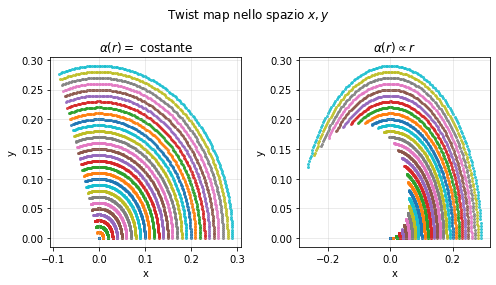

In [85]:
def polar_to_xy(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def my_integrator(step, init, alfa):
    """Definisco un Eulero al secondo ordine"""
    n = step
    theta = init[0]*np.ones(n) 
    r = init[1]*np.ones(n)
    
    x = np.array([theta, r])
    for i in range(n-1):
        x[:,i+1] = x[:,i] + np.array(motion(x[:,i], alfa))
    return x

def motion(val, alfa):
    """
    Questa funzione definisce gli incrementi secondo il formato utile a 'solve_ivp' di scykit_learn.
    """
    theta, r = val
    diff = [2 * np.pi * alfa(r),
            0]
    return diff

def main():
    """
    Funzione main: fa da collante per tutte le funzioni sopra e inoltre plotta i risultati.
    """
    fig, ax = plt.subplots(1, 2 , figsize=(7,4))
    #fig = plt.figure(figsize=(7,7))
    
    alfa_const = lambda r: 0.002
    alfa_lin = lambda r: r*0.01

    step = 150
    init_r = np.arange(0., 0.3, 0.01)
    init_theta = np.zeros(len(init_r))
    for i, alfa in enumerate([alfa_const, alfa_lin]):
        for theta_in, r_in in zip(init_theta, init_r):
            init = [theta_in, r_in]
            sol = my_integrator(step, init, alfa)
            theta, r = sol # (come scrivere sol[0,:], sol[1,:], sol[2,:], sol[3,:])
            x, y = polar_to_xy(r, theta)

            ax[i].scatter(x, y, s = 4, alpha=0.8, cmap='reds')
            ax[i].grid(alpha=0.3)
            ax[i].set_xlabel('x')
            ax[i].set_ylabel('y')
            if i == 0: ax[i].set_title(r'$\alpha(r) =$ costante')
            if i == 1: ax[i].set_title(r'$\alpha(r) \propto r$')
    fig.suptitle(r'Twist map nello spazio $x, y$')
    plt.tight_layout()
    #plt.savefig('../../figures/18_twist_tetha_r.png', dpi = 100)
    plt.show()
main()